In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
df = pd.read_csv('clean_temp.csv', parse_dates=True, index_col=0)
df = df.resample('1M').mean()
df.head(2)

TEMP
DATE                
1876-01-31 -2.070968
1876-02-29  2.389655

In [4]:
df_train = df[:"2020"]
df_test = df["2021":]

In [5]:
y_train = df_train['TEMP']

<AxesSubplot: title={'center': 'Flights'}, xlabel='Time', ylabel='Passengers'>

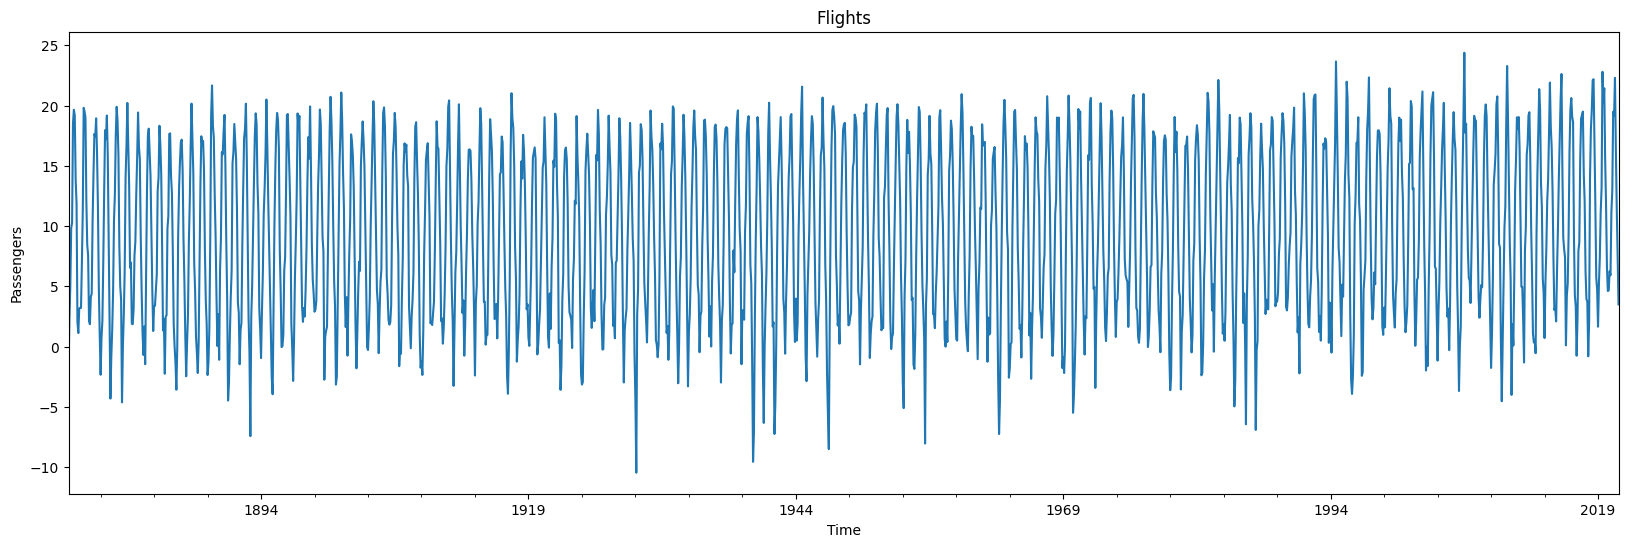

In [6]:
y_train.plot(
    figsize=(20, 6),
    title='Flights',
    ylabel='Passengers',
    xlabel='Time'
)

<AxesSubplot: xlabel='DATE'>

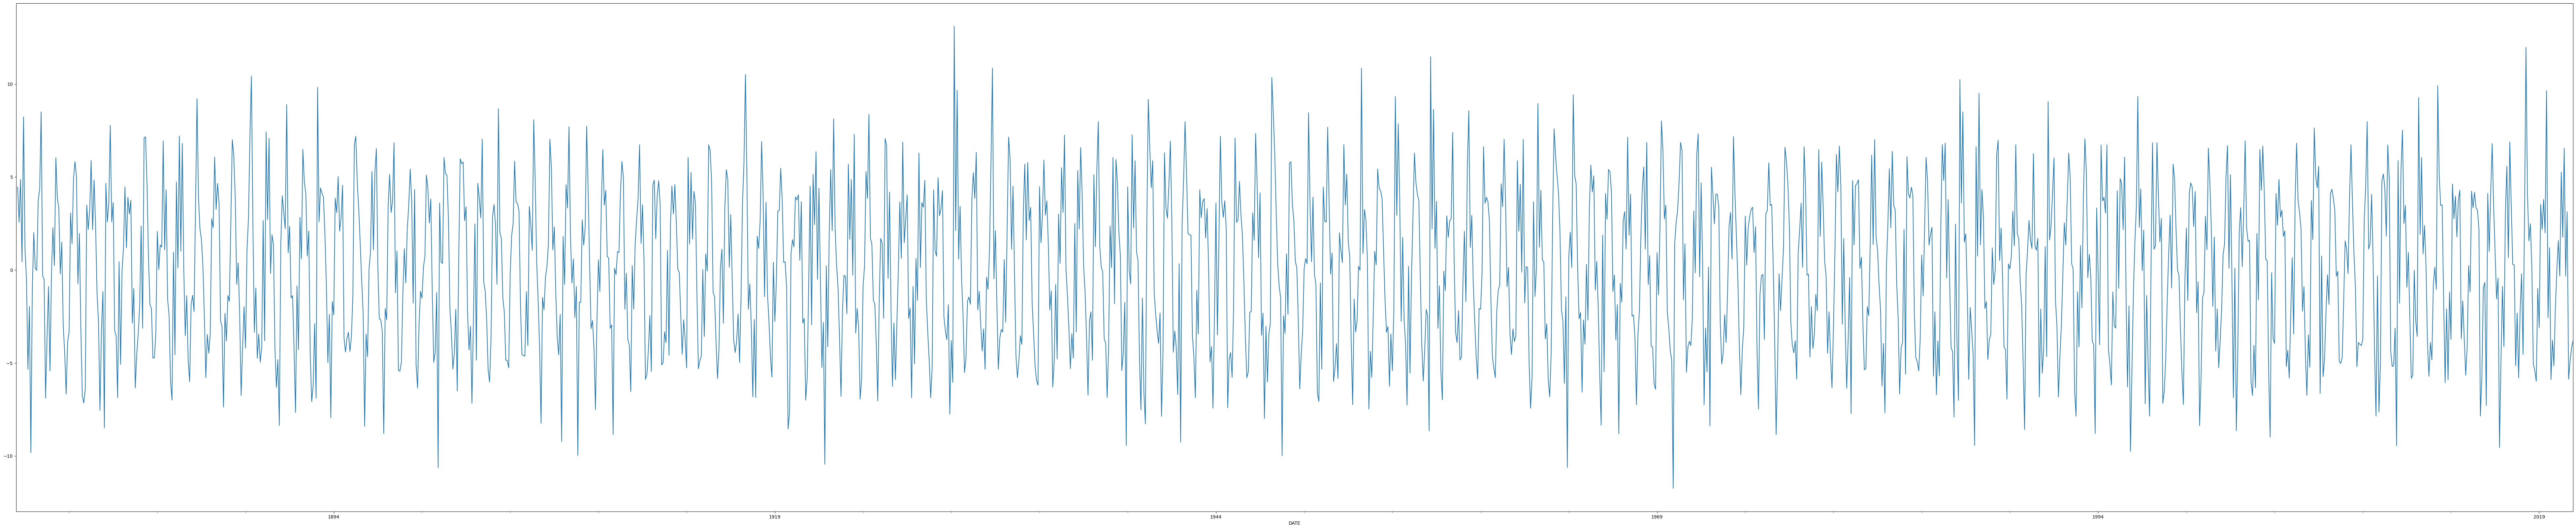

In [7]:
y_train.diff().plot(figsize=(100,20))

<AxesSubplot: xlabel='DATE'>

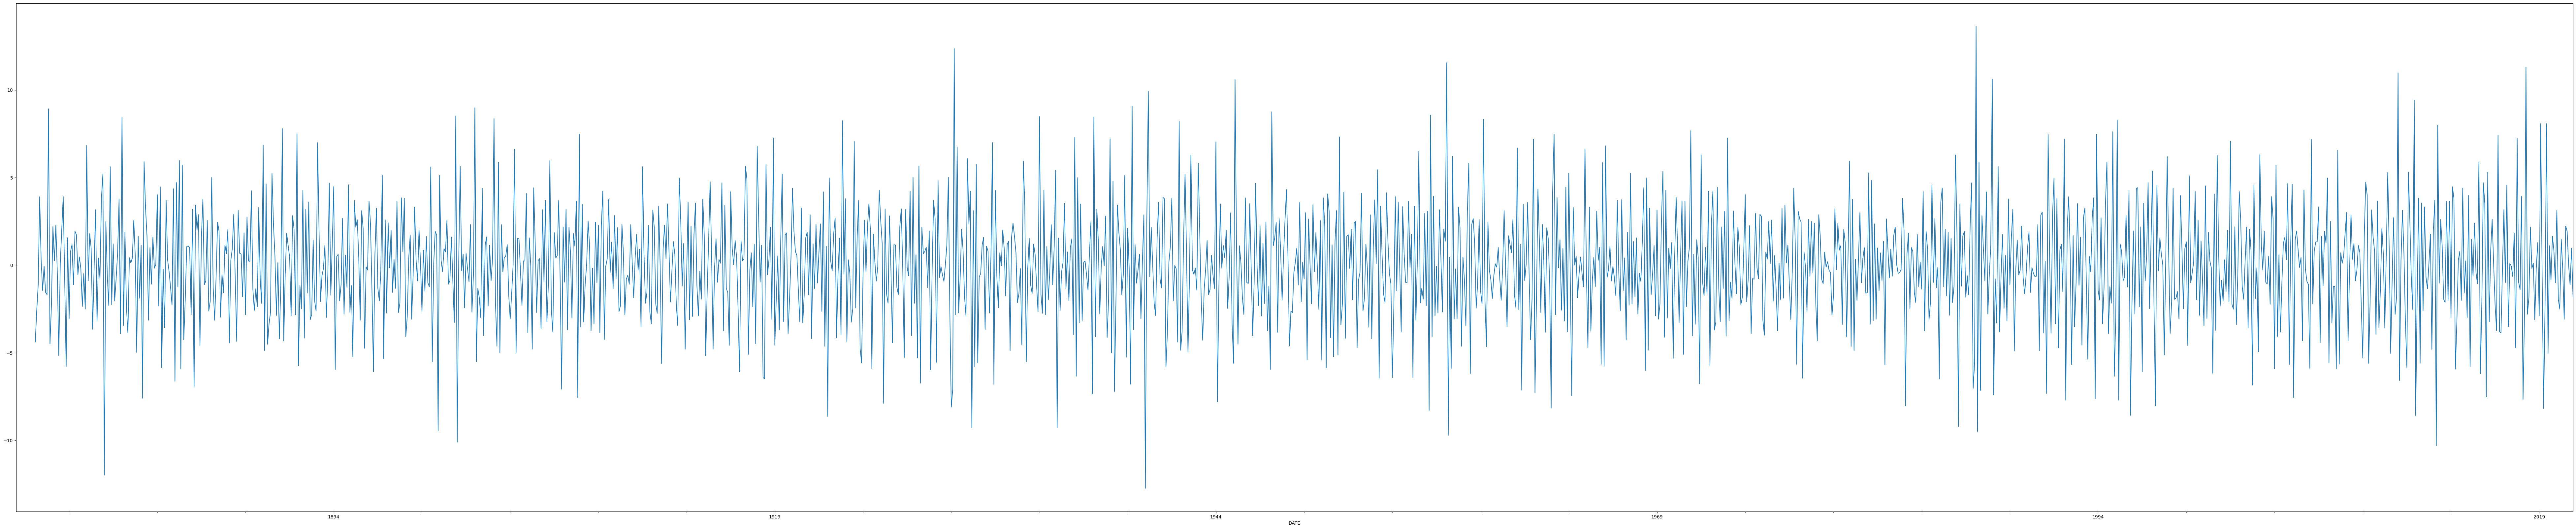

In [8]:
y_train.diff().diff(12).plot(figsize=(100,20))

In [9]:
arima = pm.AutoARIMA(
    m=12,              # seasonality cycle
    d=1,               # apply differences
    maxiter=10000,
    seasonal=True,
    start_p=1, 
    start_q=1,
    stepwise=True,
    trace=True,
    test='adf' 
)

arima.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=9978.768, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8726.546, Time=0.48 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9398.872, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=9976.769, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=9558.576, Time=0.11 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=9368.107, Time=0.61 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=9.89 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=8905.771, Time=0.28 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=8645.194, Time=0.91 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=9525.757, Time=0.18 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.99 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=i

AutoARIMA(d=1, m=12, maxiter=10000, start_p=1, start_q=1, test='adf',
          trace=True)

In [10]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1740
Model:             SARIMAX(3, 1, 1)x(1, 0, [], 12)   Log Likelihood               -4175.257
Date:                             Fri, 11 Nov 2022   AIC                           8364.513
Time:                                     14:38:58   BIC                           8402.741
Sample:                                 01-31-1876   HQIC                          8378.649
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.003      0.126      0.900      -0.006       0.006
ar.L1          0.1593      0.028      5.590      0.000       0.103       0.215
ar.L2          0.0726      0.029      2.537      0.011       0.017       0.129
ar.L3          0.0867      0.028      3.118      0.002       0.032       0.141
ma.L1         -0.9526      0.018    -53.716      0.000      -0.987      -0.918
ar.S.L12       0.9257      0.010     92.822      0.000       0.906       0.945
sigma2         7.3570      0.227     32.476      0.000       6.913       7.801
===================================================================================
Ljung-Box (L1) (Q):                   7.71   Jarque-Bera (JB):                68.87
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.15
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

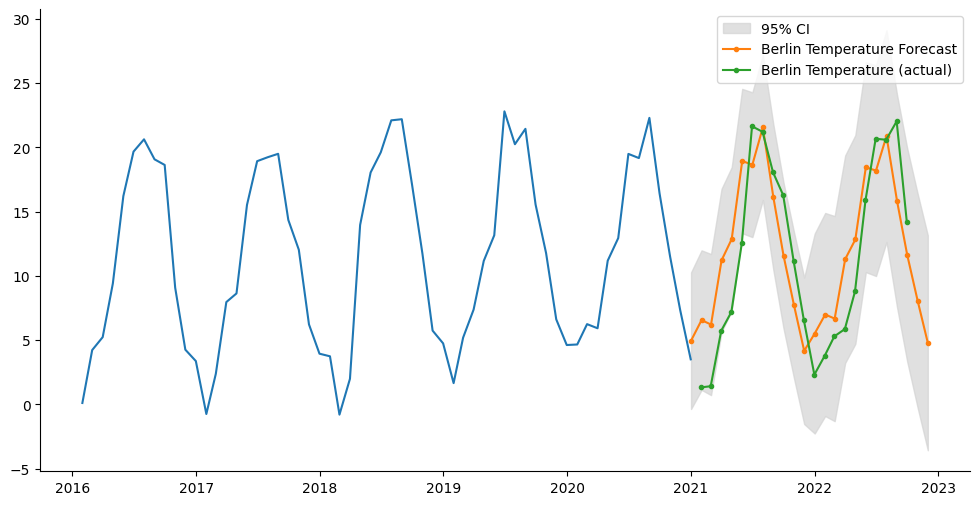

In [12]:
# forecast for the next 5 years with uncertainty area
y_forecast, ci = arima.predict(n_periods=12*2, return_conf_int=True)

# create some date values for the forecast horizon
index_vals = pd.date_range('2021-01-01', '2022-12-31', freq='MS')


plt.figure(figsize=(12,6))
plt.plot(df["2016":"2020"].index.values, df["2016":"2020"].values)
plt.fill_between(index_vals.values, ci[:,0], ci[:, 1], alpha=0.7, color='lightgrey', label='95% CI')
plt.plot(index_vals.values, y_forecast, label='Berlin Temperature Forecast', marker='.')
plt.plot(df_test.index, df_test['TEMP'], label='Berlin Temperature (actual)', marker='.')
sns.despine()
plt.legend()

In [35]:
arima = pm.AutoARIMA(
    m=12,              # seasonality cycle
    d=1,               # apply differences
    maxiter=10000,
    seasonal=True,
    start_p=1, 
    start_q=1,
    stepwise=True,
    trace=True,
    test='adf' 
)

model_fit = arima.fit(df['TEMP'])


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=4.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10098.365, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8831.701, Time=0.51 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9512.364, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10096.373, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=9672.482, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=9481.166, Time=0.64 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=5.61 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=9012.938, Time=0.29 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=8747.065, Time=0.88 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=9640.568, Time=0.21 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC

In [37]:
import pickle
with open('model_arima_all.pkl', 'wb') as pkl:
    pickle.dump(arima, pkl)